# Probando Clasificación con Gradiente descendente

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Generando dos clases sintéticas con medias $\mu_0 \neq \mu_1$**

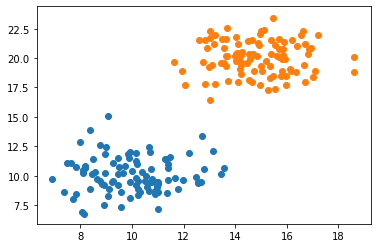

In [2]:
mean00 = [10,10]
mean01 = [15,20]

cov00 = [[2,0],[0,2]]
cov01 = [[2,0],[0,2]]

class00 = np.random.multivariate_normal(mean00, cov00, size=100, check_valid='warn', tol=1e-8)
class01 = np.random.multivariate_normal(mean01, cov01, size=100, check_valid='warn', tol=1e-8)

plt.scatter(class00[:,0],class00[:,1])
plt.scatter(class01[:,0],class01[:,1])

**Generando una sola base de datos de datos clasificados**

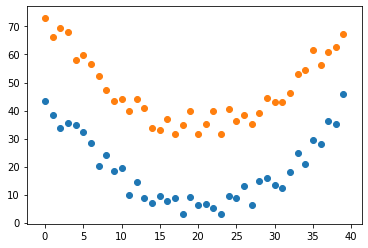

In [396]:
a = 0.1

x = np.arange(0,40)
y = a*(x-20)**2

#Agregamos ruido uniformemente distribuido 

y_noise_00 = y +np.random.rand(len(x))*10

y_noise_01 = y +np.random.rand(len(x))*10+30

plt.scatter(x,y_noise_00)

plt.scatter(x,y_noise_01)

In [401]:
class_00 = np.append([x],[y_noise_00],axis=0).T
zeros = np.zeros(len(class_00)).T

labeled_class00 = np.append(class_00,np.transpose([zeros]),axis=1)
labeled_class00

class_01 = np.append([x],[y_noise_01],axis=0).T


ones = np.ones(len(class_01)).T

labeled_class01 = np.append(class_01,np.transpose([ones]),axis=1)

ones = ones*0
labeled_class00 = np.append(class_00,np.transpose([ones]),axis=1)

In [398]:
labeled_class00

array([[ 0.        , 43.57879291,  0.        ],
       [ 1.        , 38.25686159,  0.        ],
       [ 2.        , 33.65222425,  0.        ],
       [ 3.        , 35.58326609,  0.        ],
       [ 4.        , 34.71588722,  0.        ],
       [ 5.        , 32.38702072,  0.        ],
       [ 6.        , 28.39419039,  0.        ],
       [ 7.        , 20.20082333,  0.        ],
       [ 8.        , 24.19586975,  0.        ],
       [ 9.        , 18.48536939,  0.        ],
       [10.        , 19.43098795,  0.        ],
       [11.        ,  9.78931084,  0.        ],
       [12.        , 14.4403072 ,  0.        ],
       [13.        ,  8.95888303,  0.        ],
       [14.        ,  7.17704765,  0.        ],
       [15.        ,  9.57779397,  0.        ],
       [16.        ,  7.58424501,  0.        ],
       [17.        ,  8.9341588 ,  0.        ],
       [18.        ,  3.13378008,  0.        ],
       [19.        ,  9.23532406,  0.        ],
       [20.        ,  6.43370902,  0.   

In [399]:

labeled_classes = np.append(labeled_class00,labeled_class01,axis=0)
labeled_classes

array([[ 0.        , 43.57879291,  0.        ],
       [ 1.        , 38.25686159,  0.        ],
       [ 2.        , 33.65222425,  0.        ],
       [ 3.        , 35.58326609,  0.        ],
       [ 4.        , 34.71588722,  0.        ],
       [ 5.        , 32.38702072,  0.        ],
       [ 6.        , 28.39419039,  0.        ],
       [ 7.        , 20.20082333,  0.        ],
       [ 8.        , 24.19586975,  0.        ],
       [ 9.        , 18.48536939,  0.        ],
       [10.        , 19.43098795,  0.        ],
       [11.        ,  9.78931084,  0.        ],
       [12.        , 14.4403072 ,  0.        ],
       [13.        ,  8.95888303,  0.        ],
       [14.        ,  7.17704765,  0.        ],
       [15.        ,  9.57779397,  0.        ],
       [16.        ,  7.58424501,  0.        ],
       [17.        ,  8.9341588 ,  0.        ],
       [18.        ,  3.13378008,  0.        ],
       [19.        ,  9.23532406,  0.        ],
       [20.        ,  6.43370902,  0.   

Definimos nuestra función de "costo". Decidimos implementar la derivada de la verosimilitud 

$\frac{\partial LL(\theta)}{\partial \theta_j} = \sum_{i=1}^n [y_i-sigm(\theta^T\mathbf{x}_i)]x_j$

**La programación de la derivada de la función de costo **

In [179]:
#def pd(x,y,a):
#    s = 0    
#    for i in np.arange(len(x)):
#        dif = ((y[i]-a*x[i]))
#        s = s + dif*(x[i])
#    return s



**Utilizando modelo sin Bias**
        
$\mathbf{wx}=0$

Ahora considerando: 

**Utilizando modelo con Bias**
        
$\mathbf{wx}_i+w_0=0$

$x_0w_0$ con $x_0 =  1$

**Modelo sin entrenar**

In [200]:
#inicializar parametros theta
param = np.ones(np.shape(labeled_classes)[1]-1)

#inicializar w_0 (bias)
bias = 0

In [201]:
#Ecuación de la sigmoide
sigm = lambda x: 1/(1 + np.exp(-x))

def f(x,bias=bias):
    return sigm(np.matmul(x,param)+bias)

pred = (np.array(list(map(f,labeled_classes[:,:-1])))>0.5)*1
print("Errores de clasificación:", np.sum((pred - labeled_classes[:,-1])**2))

Errores de clasificación: 20.0


In [205]:
n = 0.02


#inicializar parametros theta


#inicializar w_0 (bias)
bias = 0

x = param

#repetir varias veces
for k in range(20000):
    
    #inicializar gradiente parametros + bias
    g = np.zeros(len(param)+1)

    #por cada tupla (x,y)
    for v in labeled_classes:
    
        #asignamos la pareja (o tupla) (x_i,y_i)
        x = v[:-1]
        y = v[-1]
        
        # por cada parametro
        line = np.matmul(x,param)+1*bias
        for j in np.arange(len(x)):
    
            #gradiente evaluado con respecto a w_1 y w_2 en la derivada de la funcion de log-verosimilitud
            g[j]+=(y-sigm(line))*x[j]

        
        #gradiente evaluado con respecto a w_0
        g[2] += (y-sigm(line))*1

        
    #actualización de los parámetros
    param += n*g[:2]
    bias += n*g[2]

    
print("parametros w_1 y w_2",+param)    
print("w_0 (bias)",bias)

/Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


parametros w_1 y w_2 [-3788.84341457   153.25013059]
w_0 (bias) -849.0863257241108


In [206]:
#Ecuación de la sigmoide

def f(x,bias=bias):
    return sigm(np.matmul(x,param)+bias)

pred = (np.array(list(map(f,labeled_classes[:,:-1])))>0.5)*1
print("Errores de clasificación:", np.sum((pred - labeled_classes[:,-1])**2))

Errores de clasificación: 12.0


/Users/rodrigo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


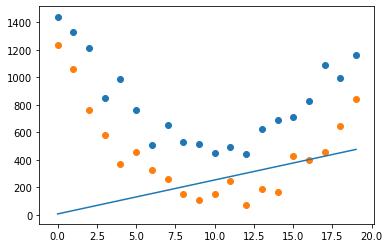

In [207]:
hmin = np.min([labeled_class01[:,0],labeled_class01[:,0]])
hmax = np.max([labeled_class00[:,0],labeled_class00[:,0]])+1
X = np.arange(hmin,hmax)
Y = (-param[0]/param[1])*X-(bias/param[1])
plt.plot(X,Y)
plt.scatter(labeled_class01[:,0],labeled_class01[:,1])
plt.scatter(labeled_class00[:,0],labeled_class00[:,1])
plt.show()

In [208]:
from random import seed
from random import random

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

seed(1)
network = initialize_network(2, 1, 2)
for layer in network:
    print(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}]
[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]


In [209]:
n_inputs =2 
n_hidden = 3 
n_outputs = 1
[{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]

[{'weights': [0.7887233511355132, 0.0938595867742349, 0.02834747652200631]},
 {'weights': [0.8357651039198697, 0.43276706790505337, 0.762280082457942]},
 {'weights': [0.0021060533511106927, 0.4453871940548014, 0.7215400323407826]}]

In [210]:
[i for i in range(n_hidden)]

[0, 1, 2]

In [212]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
    network = list()
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network

In [307]:
n_inputs = 2
hidden = 5
n_outputs = 1

network = initialize_network(n_inputs, hidden, n_outputs)

In [309]:
def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:

            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

In [310]:
ip = forward_propagate(network,[1,1])
ip

[0.9385046072822235]

In [321]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

In [340]:
nw = initialize_network(2,4,1)
nw[0]

[{'weights': [0.04002353689016469, 0.2396333648675093, 0.9881584986060327]},
 {'weights': [0.4210135874302673, 0.1155581805922733, 0.16738343746133177]},
 {'weights': [0.24142028509784308, 0.7440064165370084, 0.1028341459863098]},
 {'weights': [0.9107644182793333, 0.3782772705442261, 0.9702640365282106]}]

In [352]:
from math import exp

# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    
    # cada layer tiene varias n
    for layer in network:
        new_inputs = []
        for neuron in layer:

            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

# test forward propagation
#network = [[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
#[{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]]
row = [1, 0, None]
output = forward_propagate(nw, row)
print(output)

[0.8207008131366805]


In [359]:
for i in reversed(range(len(nw))):
    print(i)

1
0


In [361]:
nw

[[{'weights': [0.04002353689016469, 0.2396333648675093, 0.9881584986060327],
   'output': 0.7365632937244371},
  {'weights': [0.4210135874302673, 0.1155581805922733, 0.16738343746133177],
   'output': 0.6429972643060575},
  {'weights': [0.24142028509784308, 0.7440064165370084, 0.1028341459863098],
   'output': 0.5852236035211598},
  {'weights': [0.9107644182793333, 0.3782772705442261, 0.9702640365282106],
   'output': 0.8677292122401729}],
 [{'weights': [0.9092227281507113,
    0.29402358494854774,
    0.2534101360411267,
    0.47701009597226784,
    0.10012914395045203],
   'output': 0.8207008131366805}]]

In [343]:
np.shape(W)


np.matmul(W[:-1,0], np.array([1,1]))+W[-1,0]



1.571998640607758

In [288]:
weights = W[:,0]
inputs =  np.array([1,1])

def activate(weights, inputs):
    activation = weights[:-1]
    bias = weights[-1]
    activation = np.matmul(activation, inputs)+ bias
    return activation

# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + np.exp(-activation))
    
# Forward propagate input to a network output
def forward_propagate(W, row):
    inputs=row
    new_inputs = []
    for layer in W.T:
        activation = activate(layer, inputs)
        neuron = transfer(activation)
        new_inputs.append(neuron)
    return new_inputs




1.571998640607758

In [294]:
inputs = [1,1]
forward_propagate(W,inputs)
    


[0.8280683436552196,
 0.7143081817806245,
 0.7551972605475672,
 0.8360231366635603,
 0.8135540951010134]

In [273]:
W

array([[0.67227436, 0.49609619, 0.6012662 , 0.03223497, 0.19383452],
       [0.50825367, 0.00767076, 0.28360918, 0.96137032, 0.47813305],
       [0.3914706 , 0.41263388, 0.24165086, 0.63532566, 0.8013037 ]])